In [1]:
%pylab inline
import glob
import os

from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.patheffects as PathEffects
import numpy as np
import h5py

Populating the interactive namespace from numpy and matplotlib


In [2]:
hdulist = fits.open('idc71dp8q_glv.fits')
data = hdulist[1].data

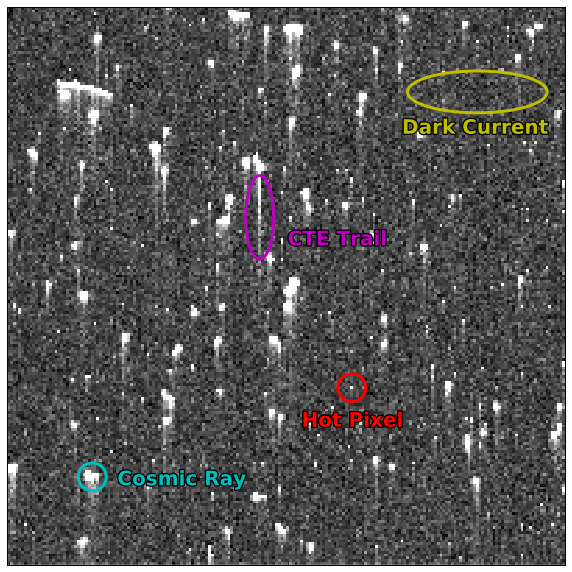

In [3]:
reg = data[2051-200:2051, 2048-200:2048]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xticklabels([])
ax.set_yticklabels([])

# Scale
mean = np.mean(reg)
vmin = mean - (mean*0.99)
vmax = mean + (mean*0.99)

# Image
ax.imshow(reg, cmap='gray', interpolation='None', vmin=vmin, vmax=vmax)

# Elipses
cte_trail = Ellipse(xy=(90, 75), width=10, height=30, edgecolor='m', fc='None', lw=3)
cosmic_ray = Ellipse(xy=(30, 168), width=10, height=10, edgecolor='c', fc='None', lw=3)
dark_current = Ellipse(xy=(168, 30), width=50, height=15, edgecolor='y', fc='None', lw=3)
hotpix = Ellipse(xy=(123, 136), width=10, height=10, edgecolor='r', fc='None', lw=3)
ax.add_artist(cte_trail)
ax.add_artist(cosmic_ray)
ax.add_artist(dark_current)
ax.add_artist(hotpix)

# Text Labels
txt1 = ax.text(141, 45, 'Dark Current', color='y', size=20, weight='bold')
txt2 = ax.text(100, 85, 'CTE Trail', color='m', size=20, weight='bold')
txt3 = ax.text(105, 150, 'Hot Pixel', color='r', size=20, weight='bold')
txt4 = ax.text(39, 171, 'Cosmic Ray', color='c', size=20, weight='bold')
txt1.set_path_effects([PathEffects.withStroke(linewidth=2.5, foreground='k')])
txt2.set_path_effects([PathEffects.withStroke(linewidth=2.5, foreground='k')])
txt3.set_path_effects([PathEffects.withStroke(linewidth=2.5, foreground='k')])
txt4.set_path_effects([PathEffects.withStroke(linewidth=2.5, foreground='k')])

plt.savefig('img/dark.png')
plt.show()

In [4]:
reg1 = data[250-100:250+100, 250-100:250+100]
reg2 = data[250-100:250+100, 450-100:450+100]
reg3 = data[250-100:250+100, 650-100:650+100]

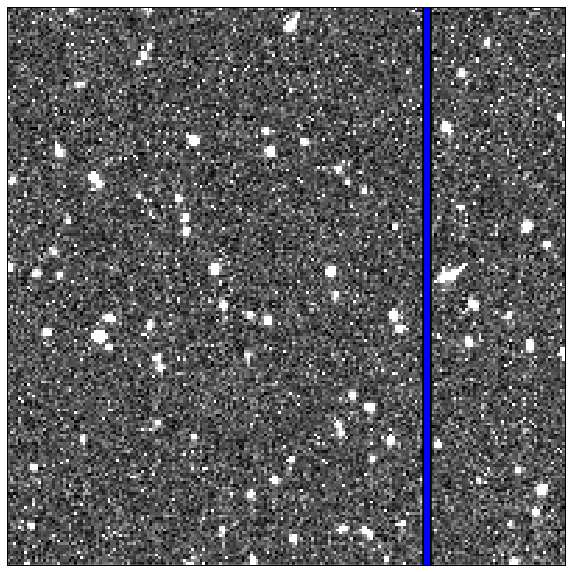

In [5]:
# Region 1
mean = np.mean(reg1)
vmin = mean - (mean*0.99)
vmax = mean + (mean*0.99)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.imshow(reg1, cmap='gray', interpolation='None', vmin=vmin, vmax=vmax)
line = ax.axvline(150, 0, 200, color='b', linewidth=6)
line.set_path_effects([PathEffects.withStroke(linewidth=9.5, foreground='k')])
plt.savefig('img/reg1.png')
plt.show()

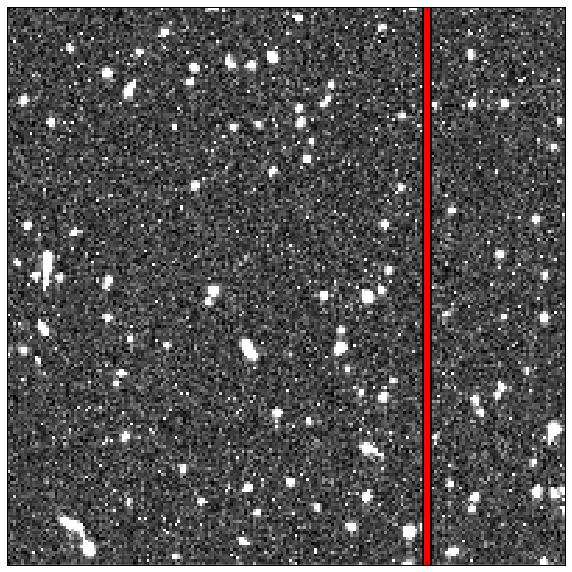

In [6]:
# Region 2
mean = np.mean(reg2)
vmin = mean - (mean*0.99)
vmax = mean + (mean*0.99)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.imshow(reg2, cmap='gray', interpolation='None', vmin=vmin, vmax=vmax)
line = ax.axvline(150, 0, 200, color='r', linewidth=6)
line.set_path_effects([PathEffects.withStroke(linewidth=9.5, foreground='k')])
plt.savefig('img/reg2.png')
plt.show()

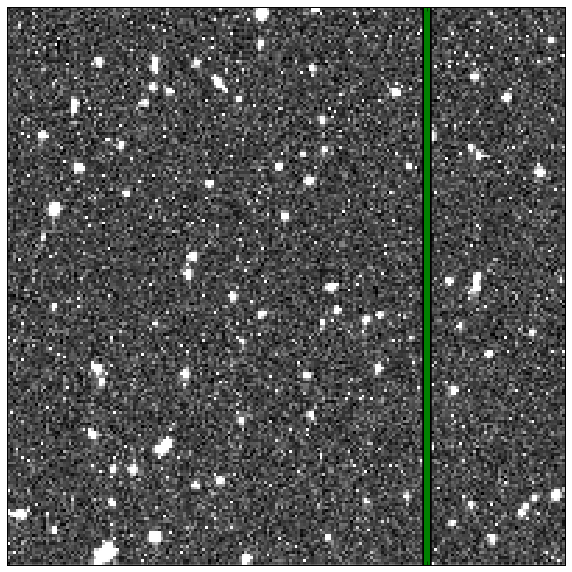

In [7]:
# Region 3
mean = np.mean(reg3)
vmin = mean - (mean*0.99)
vmax = mean + (mean*0.99)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.imshow(reg3, cmap='gray', interpolation='None', vmin=vmin, vmax=vmax)
line = ax.axvline(150, 0, 200, color='g', linewidth=6)
line.set_path_effects([PathEffects.withStroke(linewidth=9.5, foreground='k')])
plt.savefig('img/reg3.png')
plt.show()

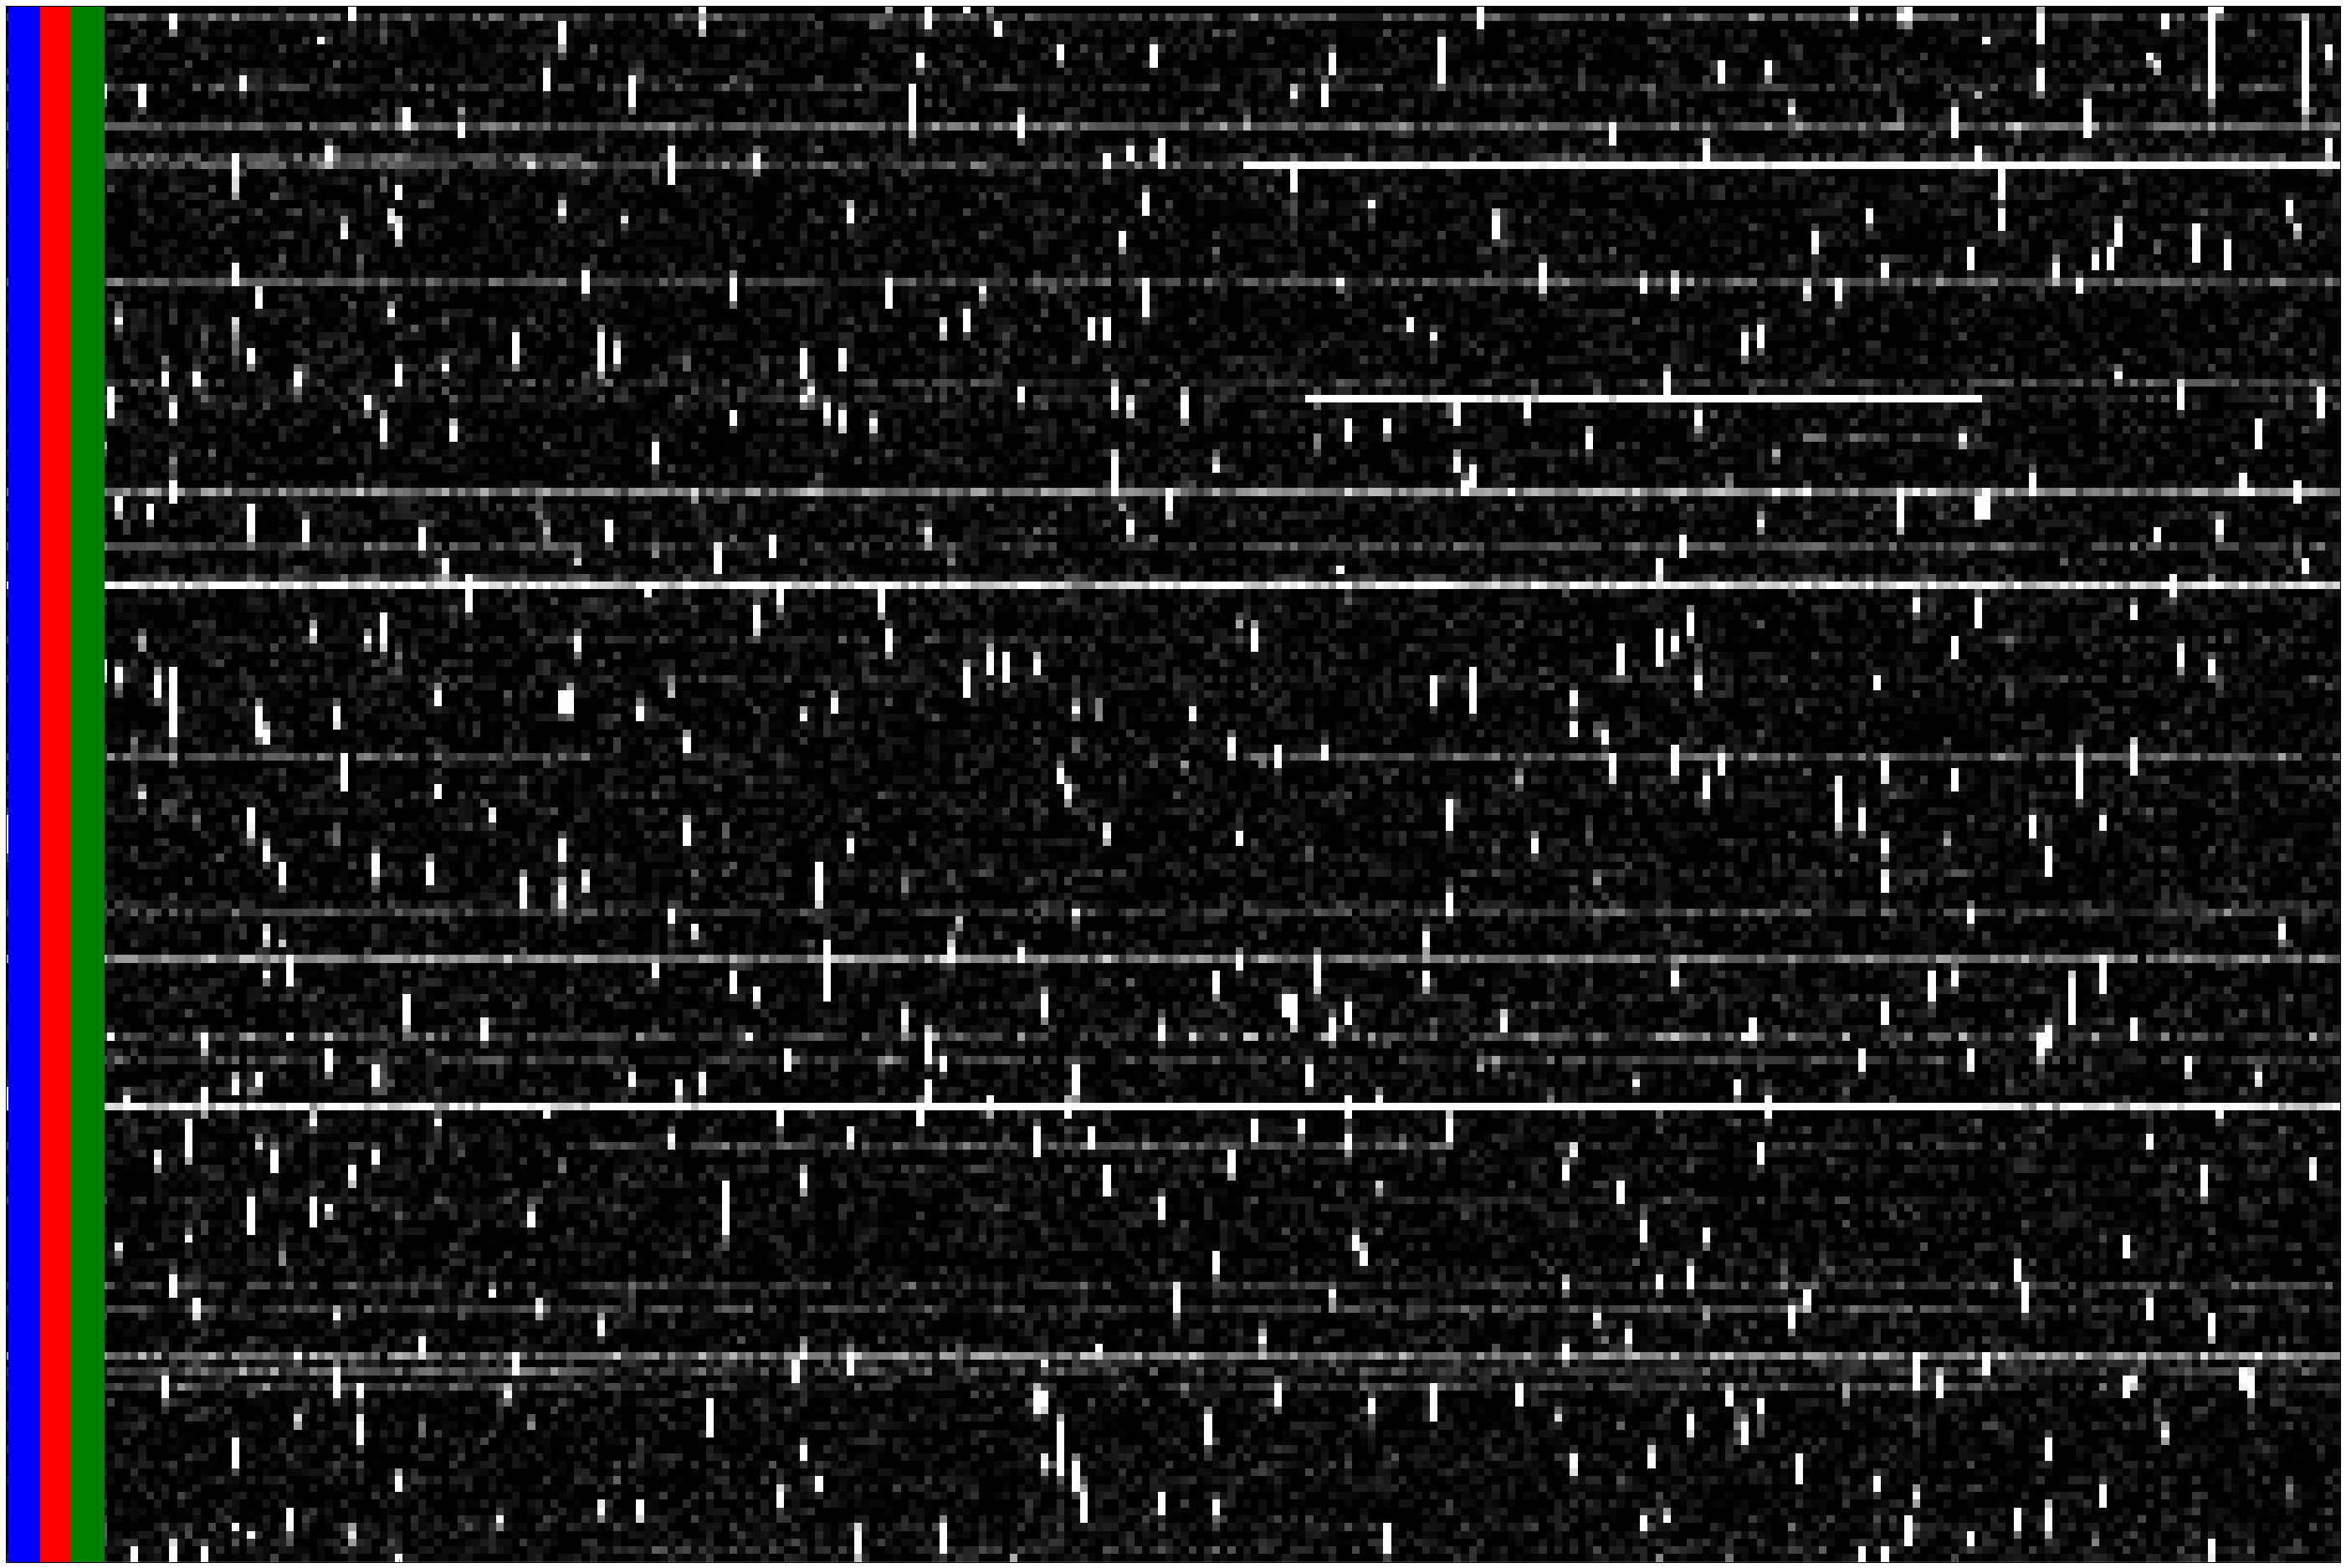

In [8]:
hdulist = fits.open('/grp/hst/wfc3b/bourque/master_column_darks/flt/master_column_100.fits')
data = hdulist[0].data[0:200,3000:3300]

fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111)
ax.set_xticklabels([])
ax.set_yticklabels([])

# Scale
mean = np.mean(data)
vmin = mean - (mean*0.99)
vmax = mean + (mean*0.99)

# Image
ax.imshow(data, cmap='gray', interpolation='None', vmin=vmin, vmax=vmax)
line = ax.axvline(2, 0, 200, color='b', linewidth=40)
line = ax.axvline(6, 0, 200, color='r', linewidth=40)
line = ax.axvline(10, 0, 200, color='g', linewidth=40)

plt.savefig('img/pixhist.png')
plt.show()

In [9]:
hdf5_files = glob.glob('/grp/hst/wfc3h/bourque/pixhist/2012-11*/*.hdf5')
hdf5_files.extend(glob.glob('/grp/hst/wfc3h/bourque/pixhist/2012-12*/*.hdf5'))
hdf5_files.extend(glob.glob('/grp/hst/wfc3h/bourque/pixhist/2013-*/*.hdf5'))
hdf5_files.extend(glob.glob('/grp/hst/wfc3h/bourque/pixhist/2014-*/*.hdf5'))
hdf5_files.extend(glob.glob('/grp/hst/wfc3h/bourque/pixhist/2015-*/*.hdf5'))
hdf5_files.extend(glob.glob('/grp/hst/wfc3h/bourque/pixhist/2016-*/*.hdf5'))

num_cold_stable, num_cold_unstable, num_hot_stable, num_hot_unstable = [], [], [], []
anneals = []

cutoff = 2.0
hot_thresh = 0.015 * 900.

for hdf5_file in sorted(hdf5_files):
    print('\tProcessing {}'.format(hdf5_file))
    with h5py.File(hdf5_file, 'r') as f:
        fratio = f['fratio'].value
        scimean = f['scimean'].value

    # Determine the % of detector for each classification
    detector_size = scimean.shape[0] * scimean.shape[1]
    hot_unstable = np.where((scimean >= hot_thresh) & (fratio >= cutoff))
    num_hot_unstable.append(round(hot_unstable[0].size / detector_size * 100., 2))
    hot_stable = np.where((scimean >= hot_thresh) & (fratio < cutoff))
    num_hot_stable.append(round(hot_stable[0].size / detector_size * 100., 2))
    cold_unstable = np.where((scimean < hot_thresh) & (fratio >= cutoff))
    num_cold_unstable.append(round(cold_unstable[0].size / detector_size * 100., 2))
    cold_stable = np.where((scimean < hot_thresh) & (fratio < cutoff))
    num_cold_stable.append(round(cold_stable[0].size / detector_size * 100., 2))

    anneal = os.path.basename(hdf5_file).split('.hdf5')[0]
    anneal = datetime.datetime.strptime(anneal, '%Y-%m-%d')
    anneals.append(anneal)

	Processing /grp/hst/wfc3h/bourque/pixhist/2012-11-08/2012-11-08.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2012-12-06/2012-12-06.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2013-01-01/2013-01-01.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2013-01-31/2013-01-31.hdf5


/Users/bourque/anaconda2/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in greater_equal
/Users/bourque/anaconda2/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in greater_equal
/Users/bourque/anaconda2/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in less
/Users/bourque/anaconda2/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in less
/Users/bourque/anaconda2/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in greater_equal
/Users/bourque/anaconda2/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in less


	Processing /grp/hst/wfc3h/bourque/pixhist/2013-02-28/2013-02-28.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2013-03-26/2013-03-26.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2013-04-26/2013-04-26.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2013-05-22/2013-05-22.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2013-06-20/2013-06-20.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2013-07-18/2013-07-18.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2013-08-15/2013-08-15.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2013-09-12/2013-09-12.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2013-10-10/2013-10-10.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2013-11-10/2013-11-10.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2013-12-04/2013-12-04.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2014-01-02/2014-01-02.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2014-01-30/2014-01-30.hdf5
	Processing /grp/hst/wfc3h/bourque/pixhist/2014-02-26/2014-02-26.hdf5
	Processing /grp/hst

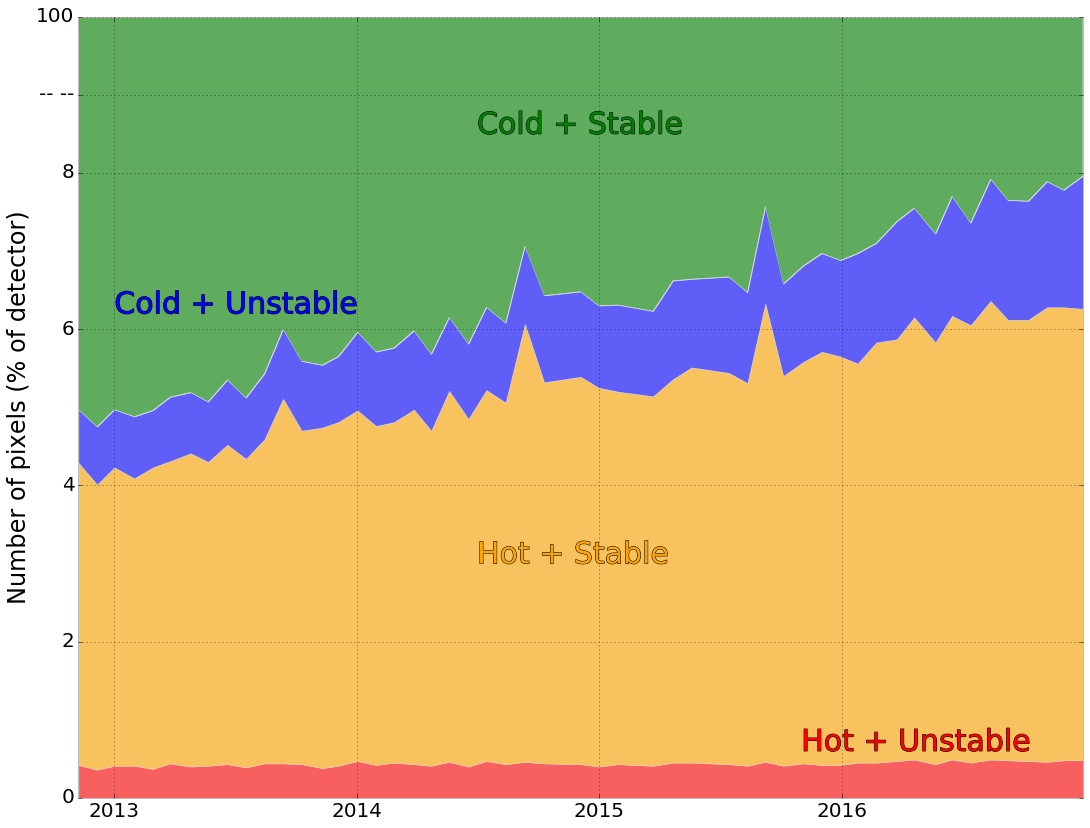

In [10]:
plt.style.use('bmh')
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(111)
mpl.rcParams['font.size'] = 20

ax.stackplot(anneals, num_hot_unstable, num_hot_stable, num_cold_unstable, num_cold_stable,
             colors=['red', 'orange', 'blue', 'green'],
             alpha=0.6)

ax.set_xticks([datetime.datetime(year,1,1) for year in range(2012,2018)])
ax.set_yticks([0, 2, 4, 6, 8, 9, 10])
ax.set_yticklabels(['0', '2', '4', '6', '8', '-- --', '100'])
ax.get_yaxis().get_major_formatter().labelOnlyBase = False
ax.set_ylim((0, 10))
ax.set_xlim((datetime.datetime(2012,11,8)), datetime.datetime(2016,12,29))
ax.set_ylabel('Number of pixels (% of detector)')

txt1 = ax.text(datetime.datetime(2014,7,1), 8.5, 'Cold + Stable', color='green', size=30)
txt2 = ax.text(datetime.datetime(2013,1,1), 6.2, 'Cold + Unstable', color='blue', size=30)
txt3 = ax.text(datetime.datetime(2014,7,1), 3.0, 'Hot + Stable', color='orange', size=30)
txt4 = ax.text(datetime.datetime(2015,11,1), 0.6, 'Hot + Unstable', color='red', size=30)

txt1.set_path_effects([PathEffects.withStroke(linewidth=1.0, foreground='k')])
txt2.set_path_effects([PathEffects.withStroke(linewidth=1.0, foreground='k')])
txt3.set_path_effects([PathEffects.withStroke(linewidth=1.0, foreground='k')])
txt4.set_path_effects([PathEffects.withStroke(linewidth=1.0, foreground='k')])

plt.savefig('img/classification.png')
plt.show()